In [1]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv
import math
import matplotlib.pyplot as pyplot

In [2]:
##################
# Data Definitions

Continent = Enum("Continent", ["North_America", "South_America", "Oceania", 
                               "Asia", "Europe", "Africa", "Europe_Asia"])
#interp. all the available continents. Continent can be one of 7 types, North_America, South_America, Oceania, Asia,
#Europe, Africa, and Europe_Asia
#examples are redundant for enumerations

@typecheck
#template based on Enumeration
def fn_for_continent(c: Continent) -> ...:
    if c == Continent.North_America:
        return ...
    if c == Continent.South_America:
        return ...
    if c == Continent.Oceania:
        return ...
    if c == Continent.Asia:
        return ...
    if c == Continent.Europe:
        return ...
    if c == Continent.Africa:
        return ...
    elif c == Continent.Europe_Asia:
        return ...

#------------------------------------------------------------------------------------------------------------------    
    
CountryData = NamedTuple('CountryData', [("gdp_per_capita", float), #in range (0, ...) 
                                         ("overall_rank", int), #in range [1, 156]
                                         ("continent", Continent)])
#interp. the necessary data to calculate a regression line. CountryData has a gdp_per_capita, which is greater than 0,
#an overall_rank which is in range of 1-156 and a continent which can be any of the types in data type Continent

CD0 = CountryData(0, 156, Continent.Africa)
CD1 = CountryData(1.6, 1, Continent.Europe)
CD2 = CountryData(1.2, 10, Continent.Asia)
CD3 = CountryData(1.2, 12, Continent.Europe)
CD4 = CountryData(1.4, 30, Continent.Europe)
CD5 = CountryData(1.4, 34, Continent.North_America)

@typecheck
#template based on Compound and ref rule
def fn_for_country_data(cd: CountryData) -> ...:
    return ...(cd.gdp_per_capita,
               cd.overall_rank,
               fn_for_continent(cd.continent))

#------------------------------------------------------------------------------------------------------------------    

# List[CountryData]
# interp. a list of CountryData

LOCD0 = []
LOCD1 = [CD0]
LOCD2 = [CD0, CD1, CD2, CD3, CD4, CD5]

@typecheck
#template based on Arbitrary Sized
def fn_for_locd(locd: List[CountryData]) -> ...:
    # description of the accumulator
    acc = ... # type: ...
    for cd in locd:
        acc = ...(cd, acc)
    return ...(acc)

#------------------------------------------------------------------------------------------------------------------    

#This data type is redundant. Can just return tuple.

# RegLine = NamedTuple("RegLine",[("slope", float),
#                                ("intercept", float)])

# #interp. RegLine has a slope and and intercept

RL0 = (0,0)
# RL1 = (100, 10)
# RL2 = (4.1, 3.1)

# @typecheck
# #template based on Compound
# def fn_for_reg_line(rl: RegLine) -> ...:
#     return ... (rl.slope, rl.intercept)


In [3]:
###########
# Functions

@typecheck
def read(filename: str) -> List[CountryData]:
    """    
    reads information from the specified file and returns a list of
    CountryData that has the gdp per capita, overall rank and continent 
    """
    #return []  #stub
    # Template from HtDAP
    # locd contains the result so far
    locd = [] # type: List[CountryData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            cd = CountryData(parse_float(row[4]), parse_int(row[0]), parse_continent(row[2]))
            locd.append(cd)
    
    return locd

@typecheck                   
def parse_continent(s: str) -> Continent:
    """
    parse string s into a Continent
    """
    #return Continent.North_America
    #template based on Simple Atomic Data
    if s == "North America":
        return Continent.North_America
    if s == "South America":
        return Continent.South_America
    if s == "Oceania":
        return Continent.Oceania
    if s == "Asia":
        return Continent.Asia
    if s == "Europe":
        return Continent.Europe
    if s == "Africa":
        return Continent.Africa
    if s == "Europe/Asia":
        return Continent.Europe_Asia

# Begin testing
start_testing()

# Examples and tests for read
expect(read("world_happiness_ranking_2019_empty_1.csv"), [])
expect(read("world_happiness_ranking_2019_oceania_2.csv"), [(1.303, 8, Continent.Oceania),
                                                          (1.372, 11, Continent.Oceania)])
expect(read("world_happiness_ranking_2019_random_3.csv"), [(1.12, 57, Continent.Africa),
                                                        (1.043, 90, Continent.Europe),
                                                        (0.831, 56, Continent.North_America),
                                                        (0.96, 65, Continent.South_America),
                                                        (0.71, 131, Continent.Asia)])

# Examples and tests for parse_continent
expect(parse_continent("North America"), Continent.North_America)
expect(parse_continent("South America"), Continent.South_America)
expect(parse_continent("Oceania"), Continent.Oceania)
expect(parse_continent("Asia"), Continent.Asia)
expect(parse_continent("Europe"), Continent.Europe)
expect(parse_continent("Africa"), Continent.Africa)
expect(parse_continent("Europe/Asia"), Continent.Europe_Asia)

# show testing summary
summary()

10 of 10 tests passed


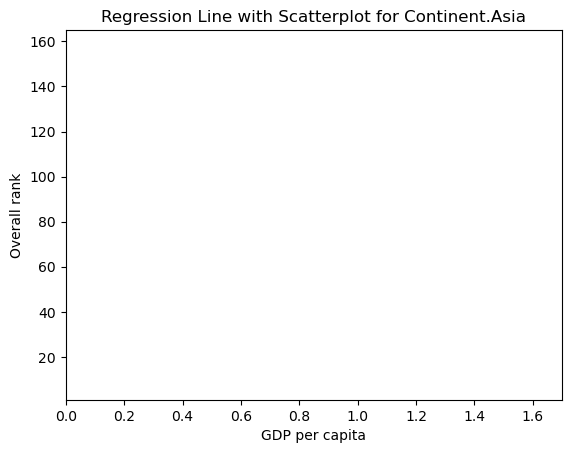

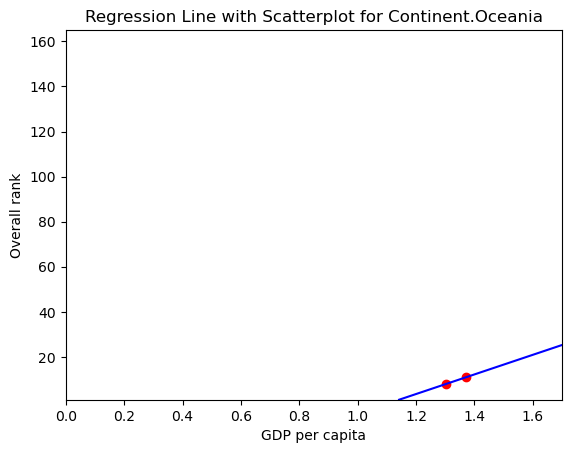

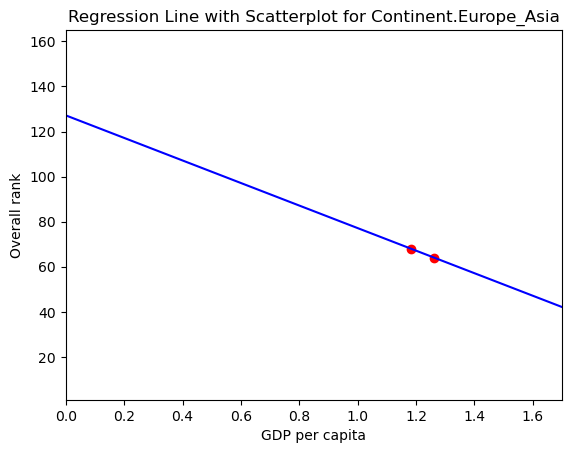

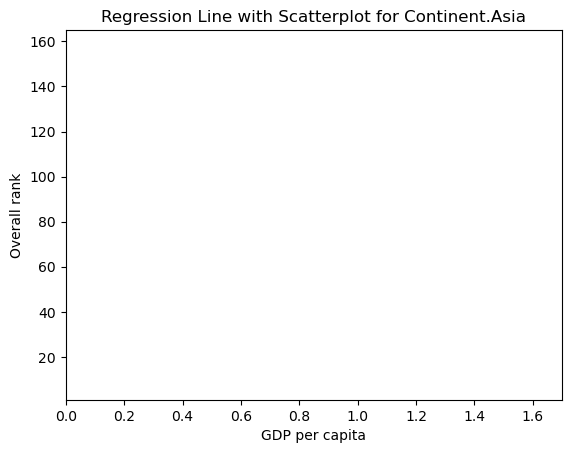

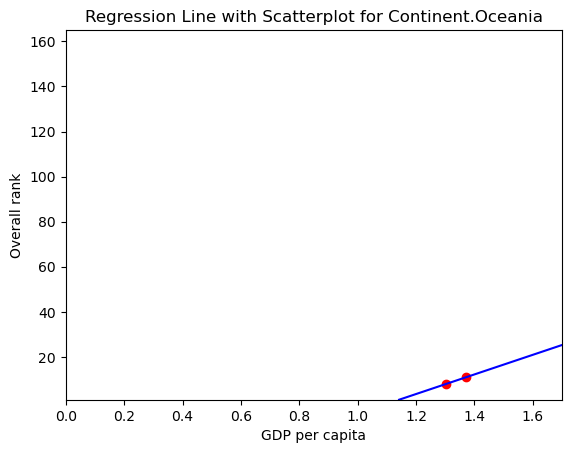

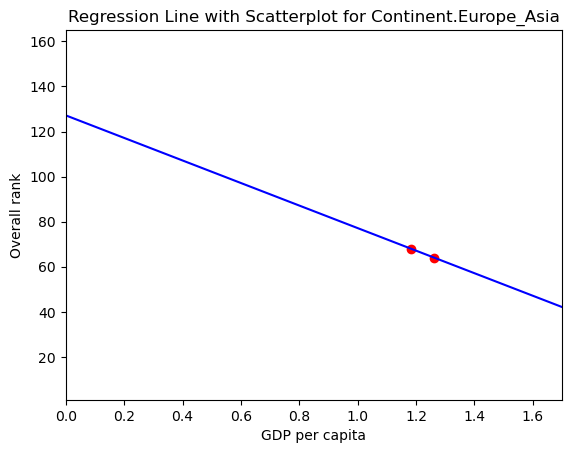

53 of 53 tests passed


In [4]:
##################
# Function Definitions

#@typecheck
def main(filename: str, c: Continent) -> None:
    """
    Reads the world happiness ranking 2019 file, including the overall rank, GDP per capita, and continent, calculates a regression line, and gets
    the (x, y) values for the given continent. Shows a graph, ploting the (x, y) values and the regression line 
    """

    #return None
    #template from DtDAP, based on composition
    
    return plot_locations(analyze(read(filename), c), filename, c)
    


@typecheck
def plot_locations(t: tuple, filename: str, c: Continent) -> None:
    """
    show a graph with all the country locations and the regression line
    """
    #template based on Visualization 
    
    regression_line = t
    x_data = gdp_list(read(filename), c)
    y_data = overall_list(read(filename), c)
    
    pyplot.plot(x_data, y_data, "ro")
    pyplot.axline((0, regression_line[1]), slope = regression_line[0], color = "b", label = "y slope")
    pyplot.axis([0, 1.7, 1, 165])
    pyplot.title("Regression Line with Scatterplot for " + str(c))
    pyplot.xlabel("GDP per capita")
    pyplot.ylabel("Overall rank")
    pyplot.show()
    return None



@typecheck
def analyze(locd: List[CountryData], c: Continent) -> tuple:
    """
    returns the regression line for the given continent
    """
    #return (0,0)
    # template based on composition
    # Plan:
    # 1. Calculate a slope for the data
    # a. Calculate the correlation
    # b. Calculate the standard deviation
    # 2. Calculate a y-int for the data
    # a. Calculate the mean 
    
    locd_gdp = gdp_list(locd, c)
    locd_overall = overall_list(locd, c)
    
    if (locd_gdp == []) and (locd_overall == []):
        return RL0
    else:
        return reg_line_calc(locd_gdp, locd_overall)


@typecheck
def reg_line_calc(locdx: List[float], locdy: List[int]) -> tuple:
    """
    returns a regression line for the given data
    """
    #return (0,0)
    # template based on Simple Atomic
    
    return (round(slope_calc(locdx, locdy), 3), round(inter_calc(locdx, locdy), 3))

#-----------------------------------------------------------------------------

@typecheck
def slope_calc(locdx: List[float], locdy: List[int]) -> float:
    """
    returns the slope of a RegLine
    """
    #return 0
    # template based on Simple Atomic
    
    return (corr_calc(locdx, locdy) * (sta_dev_calc(locdy)/sta_dev_calc(locdx)))

#-----------------------------------------------------------------------------

@typecheck
def inter_calc(locdx: List[float], locdy: List[int],) -> float:
    """
    returns the intercept of a RegLine
    """
    #return 0
    # template based on Simple Atomic
    
    return (mean_calc(locdy) - (slope_calc(locdx, locdy) * mean_calc(locdx)))
    
#-----------------------------------------------------------------------------

@typecheck
def corr_calc(locdx: List[float], locdy: List[int]) -> float:
    """
    returns the correlation coefficient
    """
    #template based on List[data]

    #sums the product of the zscores
    SumOfProduct = 0   # type: flaot
    #counts the number of values in the list
    NumberOfValues = 0 #type: float
    
    for cdx in locdx:
        SumOfProduct += product_zx_zy_calc(locdx, locdy, locdx[NumberOfValues], locdy[NumberOfValues])
        NumberOfValues += 1
        
    return SumOfProduct/(NumberOfValues-1)
      
#-----------------------------------------------------------------------------

@typecheck
def product_zx_zy_calc(locdx: List[float], locdy: List[int], cdx: float, cdy: int) -> float:
    """
    retrns product of z-score for x and z-score for y
    """
    #return 0
    #template based on Simple Atomic

    return (z_score_calc(cdx, locdx) *
            z_score_calc(cdy, locdy))

#-----------------------------------------------------------------------------

@typecheck
def z_score_calc(cd: float, locd: List[float]) -> float:
    """
    returns the zscore  
    """
    #return 0
    # template based on Simple Atomic
    
    return (cd - mean_calc(locd))/sta_dev_calc(locd)
    
#-----------------------------------------------------------------------------

@typecheck
def sta_dev_calc(locd: List[float]) -> float:
    """
    returns the standard deviation
    """
    
    #return 0
    
    # template based on List[float]

    # sum of squared values of (observations - mean)
    SumOfSquared = 0   # type: float
    #counts the number of values in the list
    NumberOfValues = 0 #type: float

    for cd in locd:
        SumOfSquared += squared_val_calc(locd[NumberOfValues], locd)
        NumberOfValues += 1
        
            
    return math.sqrt(SumOfSquared/(NumberOfValues - 1))

#-----------------------------------------------------------------------------

@typecheck
def squared_val_calc(cd: float, locd: List[float]) -> float:
    """
    returns the squared output of the value minus the mean 
    """
    #return 0
    #template based on Simple Atomic

    return (cd - mean_calc(locd))**2
    
#-----------------------------------------------------------------------------

@typecheck
def mean_calc(locd: List[float]) -> float:
    """
    returns the mean value of a column of data
    """
    #return 0 
    #template based on List[Data]
    # description of the accumulator

    # counts the total of all values in list
    TotalOfValues = 0   # type: float
    #counts the number of values in the list
    NumberOfValues = 0 #type: float

    for cd in locd:
        NumberOfValues += 1
        TotalOfValues += cd
            
    return TotalOfValues/NumberOfValues

#-----------------------------------------------------------------------------

@typecheck
def is_from_continent(i: Continent, c: Continent) -> bool:
    """
    returns true if continent given is the same as continent as that belonging to value
    """
    #return False

    #template based on Data

    return c == i

#------------------------------------------------------------------------------------------------------------------

@typecheck
def gdp_list(locd: List[CountryData], c: Continent) -> List[float]:
    """
    returns a list of gdp_per_capita data for desired country
    """
    #return []
    #template based on Arbitrary Sized and one other element
    
    # list of sorted gdp_per_capita data
    gdp_list = [] # type: List[float]
    for cd in locd:
        if is_from_continent(cd.continent, c):
            gdp_list.append(cd.gdp_per_capita)
    return gdp_list

#------------------------------------------------------------------------------------------------------------------

@typecheck
def overall_list(locd: List[CountryData], c: Continent) -> List[float]:
    """
    returns a list of overall_rank data for desired country
    """
    #return []
    #template based on Arbitrary Sized and one other element
    
    # list of sorted overall_rank data
    overall_list = [] # type: List[int]
    for cd in locd:
        if is_from_continent(cd.continent, c):
            overall_list.append(cd.overall_rank)
    return overall_list



start_testing()

#some tests for the more complex functions were calculated using RStudio to ensure accurate results. 


# show a graph with no value, the title should be "Location
    # of Crimes that Occur in a City", the x asix has E/W
    # locations and the y axis had N/S locations


####main checks:####

#expected to show a graph with no values. The title should be "Regression Line with Scatterplot for Continent.Asia".
#The x-axis has "GDP per capita", the y-axis has "Overall rank".
expect(main("world_happiness_ranking_2019_empty_1.csv", Continent.Asia), None)
#expected to show a graph with 2 points (1.303,8) and (1.372,11), and a regression line with a slope of 43.478 and a y-int of -48.652.
#The title should be "Regression Line with Scatterplot for Continent.Oceania". The x-axis has "GDP per capita", the y-axis has "Overall rank".
expect(main("world_happiness_ranking_2019_oceania_2.csv", Continent.Oceania), None)
#expected to show a graph with 2 points (1.263, 64) and (1.183, 68) and a regression line with a slope of -50.0 and a y-int of 127.15
#The title should be "Regression Line with Scatterplot for Continent.Europe_Asia". 
#The x-axis has "GDP per capita", the y-axis has "Overall rank".
expect(main("world_happiness_ranking_2019.csv", Continent.Europe_Asia), None)

####plot_locations checks:####

#expected to show a graph with no values. The title should be "Regression Line with Scatterplot for Continent.Asia".
#The x-axis has "GDP per capita", the y-axis has "Overall rank".
expect(plot_locations((0, 0),"world_happiness_ranking_2019_empty_1.csv", Continent.Asia), None)
#expected to show a graph with 2 points (1.303,8) and (1.372,11), and a regression line with a slope of 43.478 and a y-int of -48.652.
#The title should be "Regression Line with Scatterplot for Continent.Oceania". The x-axis has "GDP per capita", the y-axis has "Overall rank".
expect(plot_locations((43.478, -48.652),"world_happiness_ranking_2019_oceania_2.csv", Continent.Oceania), None)
#expected to show a graph with 2 points (1.263, 64) and (1.183, 68) and a regression line with a slope of -50.0 and a y-int of 127.15
#The title should be "Regression Line with Scatterplot for Continent.Europe_Asia". 
#The x-axis has "GDP per capita", the y-axis has "Overall rank".
expect(plot_locations((-50.0, 127.15),"world_happiness_ranking_2019.csv", Continent.Europe_Asia), None)

####analyze checks:####

expect(analyze(LOCD0, Continent.Africa), (0,0))
expect(analyze(read("world_happiness_ranking_2019.csv"), Continent.Africa), (-40.092, 142.251))
expect(analyze(read("world_happiness_ranking_2019.csv"), Continent.Asia), (-77.977, 159.014))
expect(analyze(read("world_happiness_ranking_2019.csv"), Continent.Europe), (-150.709, 229.16))
expect(analyze(read("world_happiness_ranking_2019.csv"), Continent.Europe_Asia), (-50.0, 127.15))
expect(analyze(read("world_happiness_ranking_2019.csv"), Continent.North_America), (-91.593, 130.105))
expect(analyze(read("world_happiness_ranking_2019.csv"), Continent.South_America), (-87.053, 139.057))
expect(analyze(read("world_happiness_ranking_2019.csv"), Continent.Oceania), (43.478, -48.652))

####reg_line_calc checks:####

#Simple Test
expect(reg_line_calc([1,2,3,4], [5,6,7,8]), (1.0, 4.0))

#Oceania
expect(reg_line_calc([1.303, 1.372], [8, 11]), (43.478, -48.652))

#South America
expect(reg_line_calc([1.159, 1.004, 1.124, 0.985, 1.092, 0.912, 0.776, 0.855, 0.96, 0.96, 1.231],
                  [26, 32, 33, 43, 47, 50, 61, 63, 65, 108, 39]), (-87.053, 139.057))

#North America
expect(reg_line_calc([1.365, 1.034, 1.07, 0.8, 1.149, 0.794, 0.694, 0.831, 0.642, 1.015, 0.323, 1.433],
                          [9, 12, 23, 27, 31, 35, 45, 56, 59, 77, 147, 19]), (-91.593, 130.105))

####slope_calc checks:####

#Simple Test
expect(slope_calc([1,2,3,4], [5,6,7,8]), 1.0) 

#Oceania
expect(slope_calc([1.303, 1.372], [8, 11]), 43.478260869565105)

#South America
expect(slope_calc([1.159, 1.004, 1.124, 0.985, 1.092, 0.912, 0.776, 0.855, 0.96, 0.96, 1.231],
                  [26, 32, 33, 43, 47, 50, 61, 63, 65, 108, 39]), -87.05270064191227)

####inter_calc checks:####

#Simple Test
expect(inter_calc([1,2,3,4], [5,6,7,8]), 4.0) 

#Oceania
expect(inter_calc([1.303, 1.372], [8, 11]), -48.65217391304333)

#South America
expect(inter_calc([1.159, 1.004, 1.124, 0.985, 1.092, 0.912, 0.776, 0.855, 0.96, 0.96, 1.231],
                  [26, 32, 33, 43, 47, 50, 61, 63, 65, 108, 39]), 139.05716033620598)

####corr_calc checks:####

#Simple Test
expect(corr_calc([1,2,3,4], [5,6,7,8]), 1.0) 

#Oceania
expect(corr_calc([1.303, 1.372], [8, 11]), 1)

#North America
expect(corr_calc([1.365, 1.034, 1.07, 0.8, 1.149, 0.794, 0.694, 0.831, 0.642, 1.015, 0.323, 1.433],
                 [9, 12, 23, 27, 31, 35, 45, 56, 59, 77, 147, 19]), -0.7546795)

####product_zx_zy_calc checks:####

#Simple Test
expect(product_zx_zy_calc([1,2,3,4], [5,6,7,8], [1,2,3,4][0], [5,6,7,8][0]), 1.35) 

#Oceania
expect(product_zx_zy_calc([1.303, 1.372], [8, 11], [1.303, 1.372][0], [8, 11][0],), 0.49999999999999845)

#North America
expect(product_zx_zy_calc([1.365, 1.034, 1.07, 0.8, 1.149, 0.794, 0.694, 0.831, 0.642, 1.015, 0.323, 1.433],
                          [9, 12, 23, 27, 31, 35, 45, 56, 59, 77, 147, 19],
                          [1.365, 1.034, 1.07, 0.8, 1.149, 0.794, 0.694, 0.831, 0.642, 1.015, 0.323, 1.433][0],
                          [9, 12, 23, 27, 31, 35, 45, 56, 59, 77, 147, 19][0]), -1.3165756188607285)

####z_score_calc checks:####

#Simple Test
expect(z_score_calc([1,2,3,4][0], [1,2,3,4]), -1.161895003862225) 

#Oceania
expect(z_score_calc([8, 11][0], [8, 11]), -0.7071067811865476)

#North America
expect(z_score_calc([1.365, 1.034, 1.07, 0.8, 1.149, 0.794, 0.694, 0.831, 0.642, 1.015, 0.323, 1.433][0],
                    [1.365, 1.034, 1.07, 0.8, 1.149, 0.794, 0.694, 0.831, 0.642, 1.015, 0.323, 1.433]), 1.390856)
expect(z_score_calc([9, 12, 23, 27, 31, 35, 45, 56, 59, 77, 147, 19][0],
                    [9, 12, 23, 27, 31, 35, 45, 56, 59, 77, 147, 19]), -0.9465940134359526)

####sta_dev_calc checks:####

#Simple Test
expect(sta_dev_calc([1,2,3,4]), 1.2909944487358056) 

#Oceania
expect(sta_dev_calc([8, 11]), 2.1213203435596424)

#South America
expect(sta_dev_calc([26, 32, 33, 43, 47, 50, 61, 63, 65, 108, 39]), 22.84891085528427)

#North America
expect(sta_dev_calc([1.365, 1.034, 1.07, 0.8, 1.149, 0.794, 0.694, 0.831, 0.642, 1.015, 0.323, 1.433]), 0.3133563)

####squared_val_calc checks:####

#Simple Test
expect(squared_val_calc([1,2,3,4][0], [1,2,3,4]), 2.25) 

#South America
expect(squared_val_calc([26, 32, 33, 43, 47, 50, 61, 63, 65, 108, 39][0],
                       [26, 32, 33, 43, 47, 50, 61, 63, 65, 108, 39]), 652.5702479338844) 

#Oceania 
expect(squared_val_calc([8, 11][0], [8, 11]), 2.25)

####mean_calc checks:####

#Oceania
expect(mean_calc([8, 11]), 9.5) 
expect(mean_calc([1.303, 1.372]), 1.3375)

#South America
expect(mean_calc([26, 32, 33, 43, 47, 50, 61, 63, 65, 108, 39]), 51.54545454545455) 
expect(mean_calc([1.159, 1.004, 1.124, 0.985, 1.092, 0.912, 0.776, 0.855, 0.96, 0.96, 1.231]), 1.0052727272727273) 

####is_from_country checks:####

expect(is_from_continent(Continent.Africa, Continent.Africa), True)
expect(is_from_continent(Continent.Africa, Continent.Europe), False)

####gdp_list checks:####

expect(gdp_list(LOCD0, Continent.Europe), [])
expect(gdp_list(LOCD2, Continent.Asia), [1.2])
expect(gdp_list(LOCD2, Continent.Europe), [1.6, 1.2, 1.4])

####gdp_overall checks:####

expect(overall_list(LOCD0, Continent.Europe), [])
expect(overall_list(LOCD2, Continent.Asia), [10])
expect(overall_list(LOCD2, Continent.Europe), [1, 12, 30])

summary()

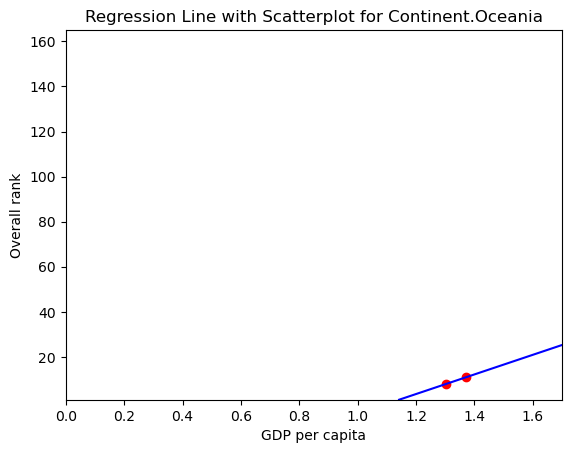

In [5]:
test1 = main("world_happiness_ranking_2019_oceania_2.csv", Continent.Oceania)

test1

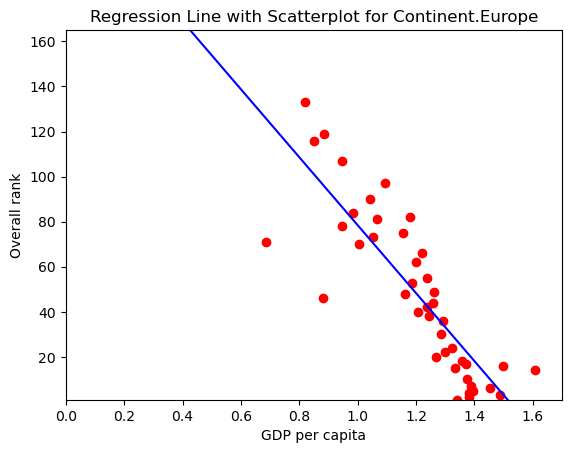

In [6]:
test1 = main("world_happiness_ranking_2019.csv", Continent.Europe)

test1
